# Load the Data

In [1]:
import pandas as pd

# Skip the first 3 lines and use comma as separator
df = pd.read_csv(
    r"C:\Users\emych\Desktop\Forcasting\ercot_load-temp_hr_2024.csv",
    skiprows=3,
    sep=",",
    encoding="utf-8-sig"
)

In [2]:
print(df.head())

  UTC Timestamp (Interval Ending)  \
0             2024-01-01 07:00:00   
1             2024-01-01 08:00:00   
2             2024-01-01 09:00:00   
3             2024-01-01 10:00:00   
4             2024-01-01 11:00:00   

  Local Timestamp Central Time (Interval Beginning)  \
0                               2024-01-01 00:00:00   
1                               2024-01-01 01:00:00   
2                               2024-01-01 02:00:00   
3                               2024-01-01 03:00:00   
4                               2024-01-01 04:00:00   

  Local Timestamp Central Time (Interval Ending)  Local Date  Hour Number  \
0                            2024-01-01 01:00:00  2024-01-01            1   
1                            2024-01-01 02:00:00  2024-01-01            2   
2                            2024-01-01 03:00:00  2024-01-01            3   
3                            2024-01-01 04:00:00  2024-01-01            4   
4                            2024-01-01 05:00:00  2024-01-01 

## Handle Missing Values

In [3]:
df.isnull().sum()

UTC Timestamp (Interval Ending)                                          0
Local Timestamp Central Time (Interval Beginning)                        0
Local Timestamp Central Time (Interval Ending)                           0
Local Date                                                               0
Hour Number                                                              0
TOTAL Actual Load (MW)                                                  36
SystemTotal Forecast Load (MW)                                          72
Coast Actual Load (MW)                                                  36
East Actual Load (MW)                                                   36
Far West Actual Load (MW)                                               36
North Actual Load (MW)                                                  36
North Central Actual Load (MW)                                          36
South Central Actual Load (MW)                                          36
Southern Actual Load (MW)

### converts the values in these three columns of your DataFrame (df) from strings (text) into Python datetime objects

In [4]:
df['UTC Timestamp (Interval Ending)'] = pd.to_datetime(df['UTC Timestamp (Interval Ending)'])
df['Local Timestamp Central Time (Interval Beginning)'] = pd.to_datetime(df['Local Timestamp Central Time (Interval Beginning)'])
df['Local Timestamp Central Time (Interval Ending)'] = pd.to_datetime(df['Local Timestamp Central Time (Interval Ending)'])


## Interpolate And Forward fill

In [5]:
df['Houston International Airport Temperature (Fahrenheit)'] = df['Houston International Airport Temperature (Fahrenheit)'].interpolate()
df['Houston Forecast Load (MW)'] = df['Houston Forecast Load (MW)'].fillna(method='ffill')

C:\Users\emych\AppData\Local\Temp\ipykernel_12764\3471082473.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Houston Forecast Load (MW)'] = df['Houston Forecast Load (MW)'].fillna(method='ffill')


##### Houston Temperature And Forecast Load Over Time plot

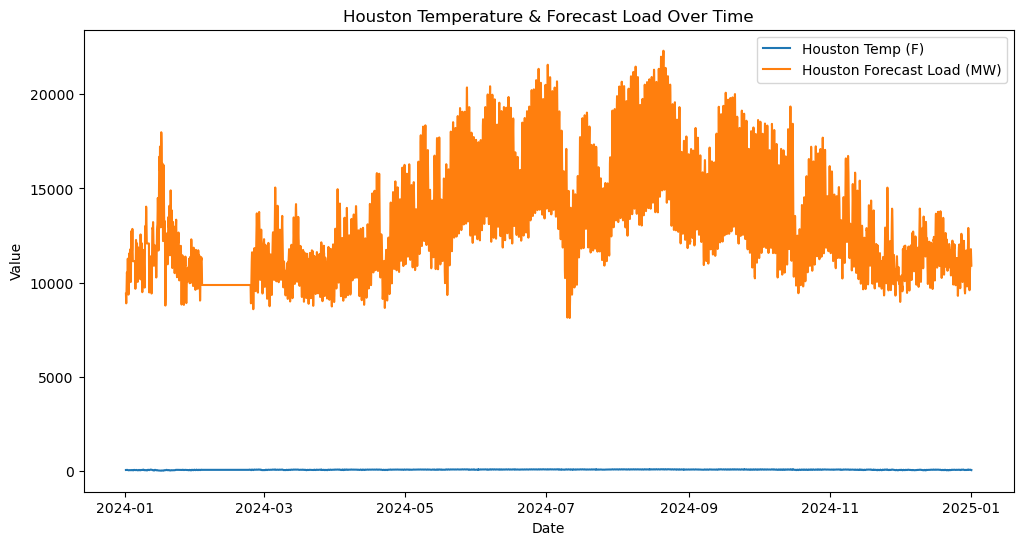

In [6]:
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt

# Create the directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

plt.figure(figsize=(12,6))
plt.plot(df['UTC Timestamp (Interval Ending)'], df['Houston International Airport Temperature (Fahrenheit)'], label='Houston Temp (F)')
plt.plot(df['UTC Timestamp (Interval Ending)'], df['Houston Forecast Load (MW)'], label='Houston Forecast Load (MW)')
plt.legend()
plt.title("Houston Temperature & Forecast Load Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.savefig("plots/Houston_temperature_&_forecast_load_over_time.png")
plt.show()


In [7]:
df

,UTC Timestamp (Interval Ending),Local Timestamp Central Time (Interval Beginning),Local Timestamp Central Time (Interval Ending),Local Date,Hour Number,TOTAL Actual Load (MW),SystemTotal Forecast Load (MW),Coast Actual Load (MW),East Actual Load (MW),Far West Actual Load (MW),...,Southern Actual Load (MW),West Actual Load (MW),Houston Forecast Load (MW),North Forecast Load (MW),South Forecast Load (MW),West Forecast Load (MW),Dallas / Fort Worth Temperature (Fahrenheit),Dallas / Fort Worth Temperature Observation Time (Central),Houston International Airport Temperature (Fahrenheit),Houston International Airport Temperature Observation Time (Central)
0,2024-01-01 07:00:00,2024-01-01 00:00:00,2024-01-01 01:00:00,2024-01-01,1,41367.30,41377.666016,10228.50,1560.09,6377.13,...,2939.14,1129.61,9410.839306,14503.732500,10297.206555,7165.887655,37.9,2024-01-01 00:53:00,57.0,2024-01-01 00:53:00
1,2024-01-01 08:00:00,2024-01-01 01:00:00,2024-01-01 02:00:00,2024-01-01,2,41630.87,40879.754883,10109.71,1651.06,6477.34,...,2904.21,1151.45,9203.292763,14578.437110,10063.078107,7034.946903,37.0,2024-01-01 01:53:00,57.0,2024-01-01 01:53:00
2,2024-01-01 09:00:00,2024-01-01 02:00:00,2024-01-01 03:00:00,2024-01-01,3,41563.17,40443.660156,9966.45,1607.69,6417.21,...,2845.38,1150.91,8969.837671,14768.408459,9745.001380,6960.412647,36.0,2024-01-01 02:53:00,57.0,2024-01-01 02:53:00
3,2024-01-01 10:00:00,2024-01-01 03:00:00,2024-01-01 04:00:00,2024-01-01,4,41539.61,40379.498535,9859.82,1631.72,6487.37,...,2761.70,1099.27,8900.567030,14879.662196,9620.046096,6979.223213,35.1,2024-01-01 03:53:00,55.9,2024-01-01 03:53:00
4,2024-01-01 11:00:00,2024-01-01 04:00:00,2024-01-01 05:00:00,2024-01-01,5,42199.84,40766.053589,9866.17,1714.81,6508.36,...,2742.70,1094.15,8924.569180,15127.530751,9660.158098,7053.795560,34.0,2024-01-01 04:53:00,55.9,2024-01-01 04:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,2025-01-01 02:00:00,2024-12-31 19:00:00,2024-12-31 20:00:00,2024-12-31,20,47686.67,49380.120117,11660.53,1638.94,7205.80,...,3757.30,1253.36,11579.770045,16476.868374,12573.627838,8749.853861,48.9,2024-12-31 19:53:00,59.0,2024-12-31 19:53:00
8300,2025-01-01 03:00:00,2024-12-31 20:00:00,2024-12-31 21:00:00,2024-12-31,21,47029.56,49025.120972,11305.48,1638.82,7610.55,...,3542.20,1239.55,11401.059937,16557.308071,12351.924768,8714.828196,48.0,2024-12-31 20:53:00,57.0,2024-12-31 20:53:00
8301,2025-01-01 04:00:00,2024-12-31 21:00:00,2024-12-31 22:00:00,2024-12-31,22,46399.26,48771.809814,11007.76,1644.85,7681.70,...,3391.76,1167.86,11302.529820,16590.753824,12095.407649,8783.118521,45.0,2024-12-31 21:53:00,55.0,2024-12-31 21:53:00
8302,2025-01-01 05:00:00,2024-12-31 22:00:00,2024-12-31 23:00:00,2024-12-31,23,45299.87,47700.809814,10677.27,1635.56,7787.18,...,3279.98,1135.24,11120.841029,16035.782797,11698.214181,8845.971807,44.1,2024-12-31 22:53:00,52.0,2024-12-31 22:53:00


In [8]:
df.isnull().sum()

UTC Timestamp (Interval Ending)                                          0
Local Timestamp Central Time (Interval Beginning)                        0
Local Timestamp Central Time (Interval Ending)                           0
Local Date                                                               0
Hour Number                                                              0
TOTAL Actual Load (MW)                                                  36
SystemTotal Forecast Load (MW)                                          72
Coast Actual Load (MW)                                                  36
East Actual Load (MW)                                                   36
Far West Actual Load (MW)                                               36
North Actual Load (MW)                                                  36
North Central Actual Load (MW)                                          36
South Central Actual Load (MW)                                          36
Southern Actual Load (MW)

In [9]:
df['UTC Timestamp'] = pd.to_datetime(df.index)  # Convert index back to column if needed
df = df.reset_index()  # Reset in case you had previously set datetime as index
df['UTC Timestamp'] = pd.to_datetime(df['UTC Timestamp (Interval Ending)'])
df = df.set_index('UTC Timestamp')


In [10]:
temp_cols = [
    'Houston International Airport Temperature (Fahrenheit)',
    'Dallas / Fort Worth Temperature (Fahrenheit)',
    'TOTAL Actual Load (MW)',
    'Coast Actual Load (MW)',
    'East Actual Load (MW)',
    'Far West Actual Load (MW)',
    'North Actual Load (MW)',
    'North Central Actual Load (MW)',
    'South Central Actual Load (MW)',
    'Southern Actual Load (MW)',
    'West Actual Load (MW)'
]

for col in temp_cols:
    df[col] = df[col].interpolate(method='time')


In [11]:
forecast_cols = [
    'SystemTotal Forecast Load (MW)',
    'Houston Forecast Load (MW)',
    'North Forecast Load (MW)',
    'South Forecast Load (MW)',
    'West Forecast Load (MW)'
]

for col in forecast_cols:
    df[col] = df[col].fillna(method='ffill').fillna(method='bfill')


C:\Users\emych\AppData\Local\Temp\ipykernel_12764\3186553634.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')


In [12]:
df.isnull().sum()

index                                                                    0
UTC Timestamp (Interval Ending)                                          0
Local Timestamp Central Time (Interval Beginning)                        0
Local Timestamp Central Time (Interval Ending)                           0
Local Date                                                               0
Hour Number                                                              0
TOTAL Actual Load (MW)                                                   0
SystemTotal Forecast Load (MW)                                           0
Coast Actual Load (MW)                                                   0
East Actual Load (MW)                                                    0
Far West Actual Load (MW)                                                0
North Actual Load (MW)                                                   0
North Central Actual Load (MW)                                           0
South Central Actual Load

In [13]:
df = df.dropna()

In [14]:
df

,index,UTC Timestamp (Interval Ending),Local Timestamp Central Time (Interval Beginning),Local Timestamp Central Time (Interval Ending),Local Date,Hour Number,TOTAL Actual Load (MW),SystemTotal Forecast Load (MW),Coast Actual Load (MW),East Actual Load (MW),...,Southern Actual Load (MW),West Actual Load (MW),Houston Forecast Load (MW),North Forecast Load (MW),South Forecast Load (MW),West Forecast Load (MW),Dallas / Fort Worth Temperature (Fahrenheit),Dallas / Fort Worth Temperature Observation Time (Central),Houston International Airport Temperature (Fahrenheit),Houston International Airport Temperature Observation Time (Central)
UTC Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-01 07:00:00,0,2024-01-01 07:00:00,2024-01-01 00:00:00,2024-01-01 01:00:00,2024-01-01,1,41367.30,41377.666016,10228.50,1560.09,...,2939.14,1129.61,9410.839306,14503.732500,10297.206555,7165.887655,37.9,2024-01-01 00:53:00,57.0,2024-01-01 00:53:00
2024-01-01 08:00:00,1,2024-01-01 08:00:00,2024-01-01 01:00:00,2024-01-01 02:00:00,2024-01-01,2,41630.87,40879.754883,10109.71,1651.06,...,2904.21,1151.45,9203.292763,14578.437110,10063.078107,7034.946903,37.0,2024-01-01 01:53:00,57.0,2024-01-01 01:53:00
2024-01-01 09:00:00,2,2024-01-01 09:00:00,2024-01-01 02:00:00,2024-01-01 03:00:00,2024-01-01,3,41563.17,40443.660156,9966.45,1607.69,...,2845.38,1150.91,8969.837671,14768.408459,9745.001380,6960.412647,36.0,2024-01-01 02:53:00,57.0,2024-01-01 02:53:00
2024-01-01 10:00:00,3,2024-01-01 10:00:00,2024-01-01 03:00:00,2024-01-01 04:00:00,2024-01-01,4,41539.61,40379.498535,9859.82,1631.72,...,2761.70,1099.27,8900.567030,14879.662196,9620.046096,6979.223213,35.1,2024-01-01 03:53:00,55.9,2024-01-01 03:53:00
2024-01-01 11:00:00,4,2024-01-01 11:00:00,2024-01-01 04:00:00,2024-01-01 05:00:00,2024-01-01,5,42199.84,40766.053589,9866.17,1714.81,...,2742.70,1094.15,8924.569180,15127.530751,9660.158098,7053.795560,34.0,2024-01-01 04:53:00,55.9,2024-01-01 04:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01 02:00:00,8299,2025-01-01 02:00:00,2024-12-31 19:00:00,2024-12-31 20:00:00,2024-12-31,20,47686.67,49380.120117,11660.53,1638.94,...,3757.30,1253.36,11579.770045,16476.868374,12573.627838,8749.853861,48.9,2024-12-31 19:53:00,59.0,2024-12-31 19:53:00
2025-01-01 03:00:00,8300,2025-01-01 03:00:00,2024-12-31 20:00:00,2024-12-31 21:00:00,2024-12-31,21,47029.56,49025.120972,11305.48,1638.82,...,3542.20,1239.55,11401.059937,16557.308071,12351.924768,8714.828196,48.0,2024-12-31 20:53:00,57.0,2024-12-31 20:53:00
2025-01-01 04:00:00,8301,2025-01-01 04:00:00,2024-12-31 21:00:00,2024-12-31 22:00:00,2024-12-31,22,46399.26,48771.809814,11007.76,1644.85,...,3391.76,1167.86,11302.529820,16590.753824,12095.407649,8783.118521,45.0,2024-12-31 21:53:00,55.0,2024-12-31 21:53:00


## Convert Date Columns

In [15]:
df.columns

Index(['index', 'UTC Timestamp (Interval Ending)',
       'Local Timestamp Central Time (Interval Beginning)',
       'Local Timestamp Central Time (Interval Ending)', 'Local Date',
       'Hour Number', 'TOTAL Actual Load (MW)',
       'SystemTotal Forecast Load (MW)', 'Coast Actual Load (MW)',
       'East Actual Load (MW)', 'Far West Actual Load (MW)',
       'North Actual Load (MW)', 'North Central Actual Load (MW)',
       'South Central Actual Load (MW)', 'Southern Actual Load (MW)',
       'West Actual Load (MW)', 'Houston Forecast Load (MW)',
       'North Forecast Load (MW)', 'South Forecast Load (MW)',
       'West Forecast Load (MW)',
       'Dallas / Fort Worth Temperature (Fahrenheit)',
       'Dallas / Fort Worth Temperature Observation Time (Central)',
       'Houston International Airport Temperature (Fahrenheit)',
       'Houston International Airport Temperature Observation Time (Central)'],
      dtype='object')

In [16]:
df['datetime'] = pd.to_datetime(df['UTC Timestamp (Interval Ending)'])

## Set the Index

In [17]:
df.set_index('datetime', inplace=True)

# Visualizing the Data
## Ploting the load data to identify trends and seasonality

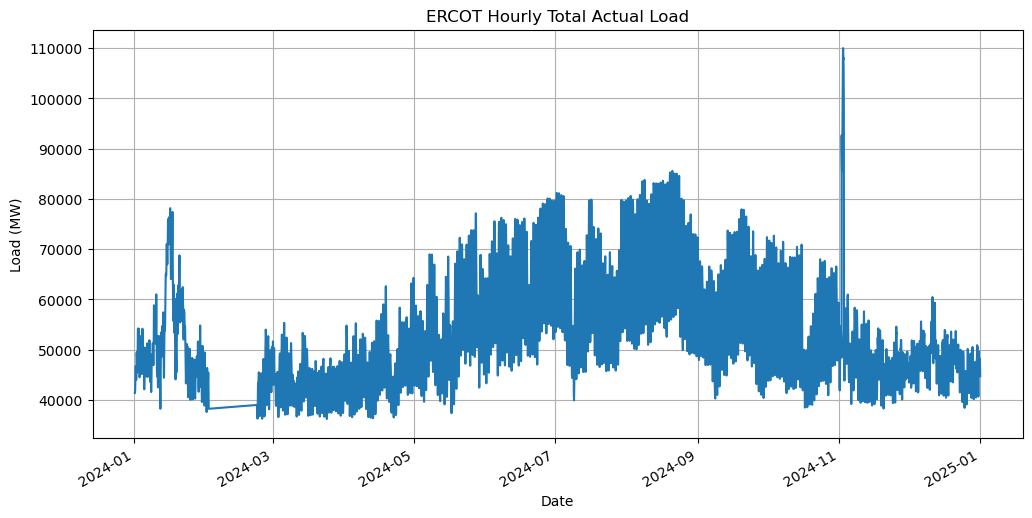

In [18]:
import matplotlib.pyplot as plt

# Optional: if datetime index is not already set, do this
# df['UTC Timestamp (Interval Ending)'] = pd.to_datetime(df['UTC Timestamp (Interval Ending)'])
# df.set_index('UTC Timestamp (Interval Ending)', inplace=True)

# Plot actual load
df['TOTAL Actual Load (MW)'].plot(figsize=(12, 6))
plt.title('ERCOT Hourly Total Actual Load')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.grid(True)
plt.savefig("plots/ERRCOT_hour_total_actul_load.png")
plt.show()


# Decompose the Time Series
## Using seasonal decomposition to understand the components

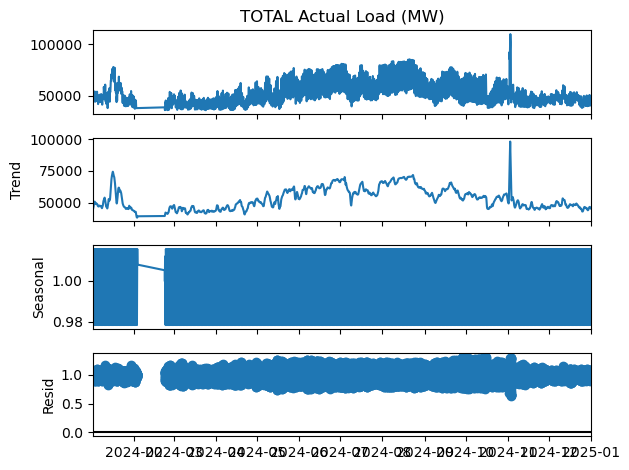

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose with 24-hour cycle (daily seasonality in hourly data)
result = seasonal_decompose(df['TOTAL Actual Load (MW)'], model='multiplicative', period=24)

# Plot results
result.plot()
plt.tight_layout()
plt.savefig("plots/Total_actual_load(MW).png")
plt.show()


# Train a Forecasting Model
## Use a model like ARIMA or Prophet for forecasting

13:49:41 - cmdstanpy - INFO - Chain [1] start processing
13:49:45 - cmdstanpy - INFO - Chain [1] done processing


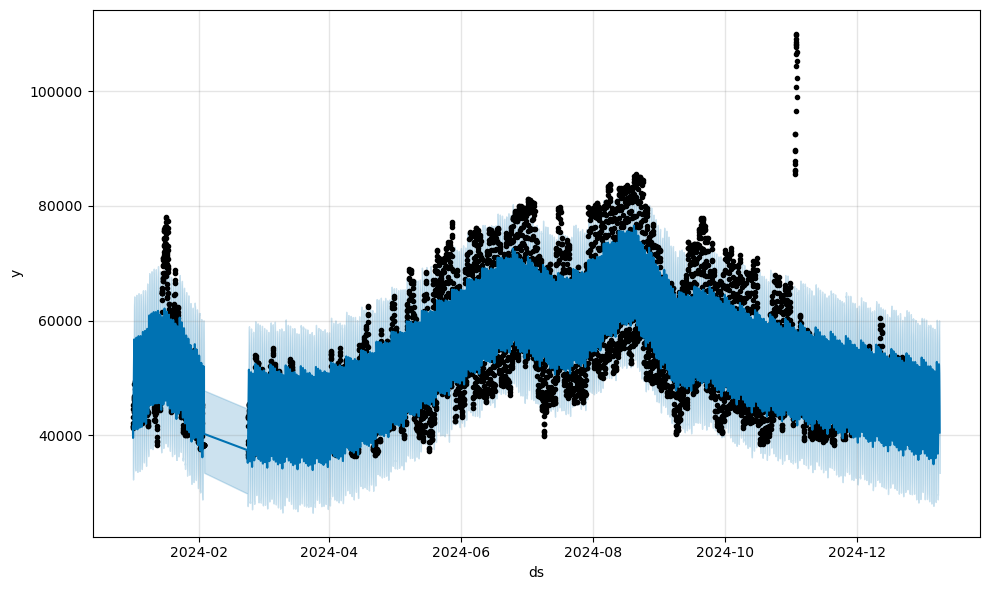

<Figure size 640x480 with 0 Axes>

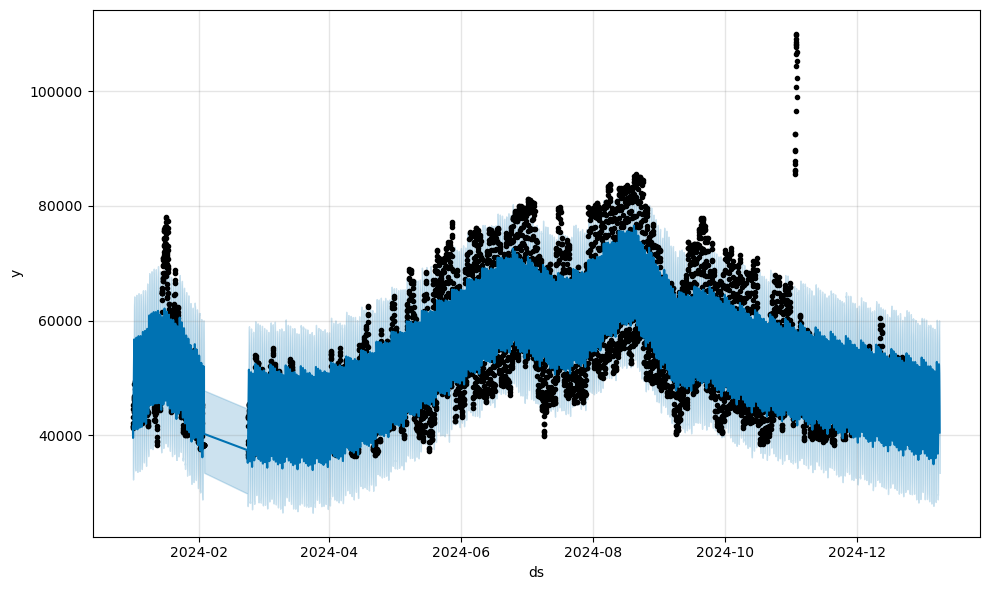

In [20]:
from prophet import Prophet

# Prepare data
df_prophet = df.reset_index()[['UTC Timestamp (Interval Ending)', 'TOTAL Actual Load (MW)']]
df_prophet.columns = ['ds', 'y']

# Train model
model = Prophet()
model.fit(df_prophet)

# Forecast next 7 days (hourly)
future = model.make_future_dataframe(periods=24 * 7, freq='H')
forecast = model.predict(future)

# Plot
model.plot(forecast)
